In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [15]:
def min_max_normalization(x):
    x_max = x.max()
    x_min = x.min()
    x_range = x_max-x_min
    return pd.Series([(i-x_min)/x_range for i in x])

In [16]:
df = pd.read_csv('dataset.csv')

# Cleaning

In [17]:
df

,I_Id,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_category,I_MRP_US,O_Id,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,I_O_Sales
0,FDA15,9.300,Low Fat,0.016172,225.644532,Dairy,317.8092,OUT049,2009,Medium,NO,Tier 1,Carrefour,3915.1380
1,DRC01,5.920,Regular,0.019403,82.551132,Soft Drinks,116.2692,OUT018,2019,Medium,YES,Tier 3,C-Town,623.4228
2,FDN15,17.500,Low Fat,0.016885,148.828780,Meat,209.6180,OUT049,2009,Medium,NO,Tier 1,Carrefour,2277.2700
3,FDX07,19.200,Regular,0.000000,177.567450,Fruits and Vegetables,250.0950,OUT010,2008,NaN,NO,Tier 3,Family Basket,912.3800
4,NCD19,8.930,Low Fat,0.000000,86.521594,Household,121.8614,OUT013,1997,High,NO,Tier 3,Carrefour,1174.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056908,200.590478,Snack Foods,282.5218,OUT013,1997,High,NO,Tier 3,Carrefour,2958.3834
8519,FDS36,8.380,Regular,0.047107,125.071470,Baking Goods,176.1570,OUT045,2012,NaN,NO,Tier 2,Carrefour,729.2850
8520,NCJ29,10.600,Low Fat,0.035311,108.716904,Health and Hygiene,153.1224,OUT035,2014,Small,NO,Tier 2,Carrefour,1373.1136
8521,FDN46,7.210,Regular,0.145346,121.504572,Snack Foods,171.1332,OUT018,2019,Medium,NO,Tier 3,C-Town,2025.5976


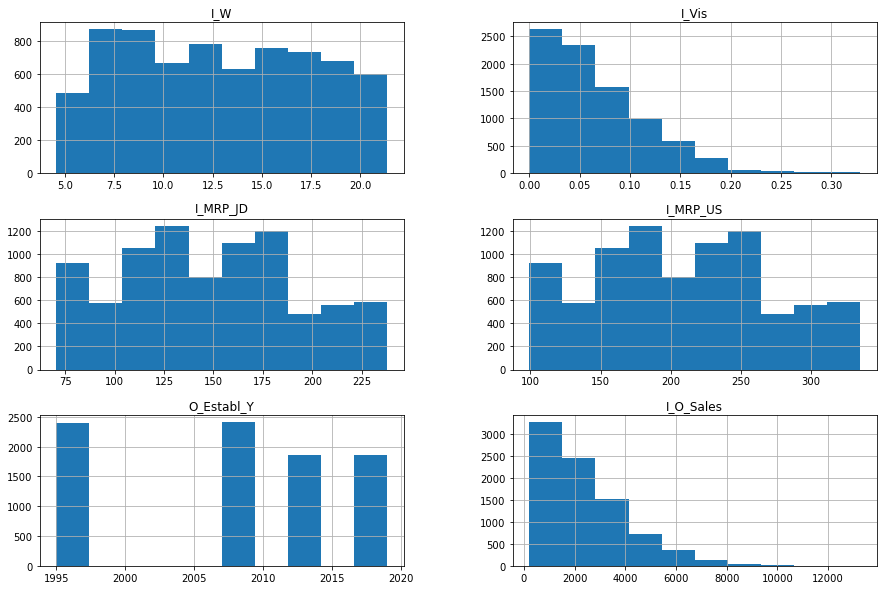

In [18]:
df.hist(figsize=(15, 10));

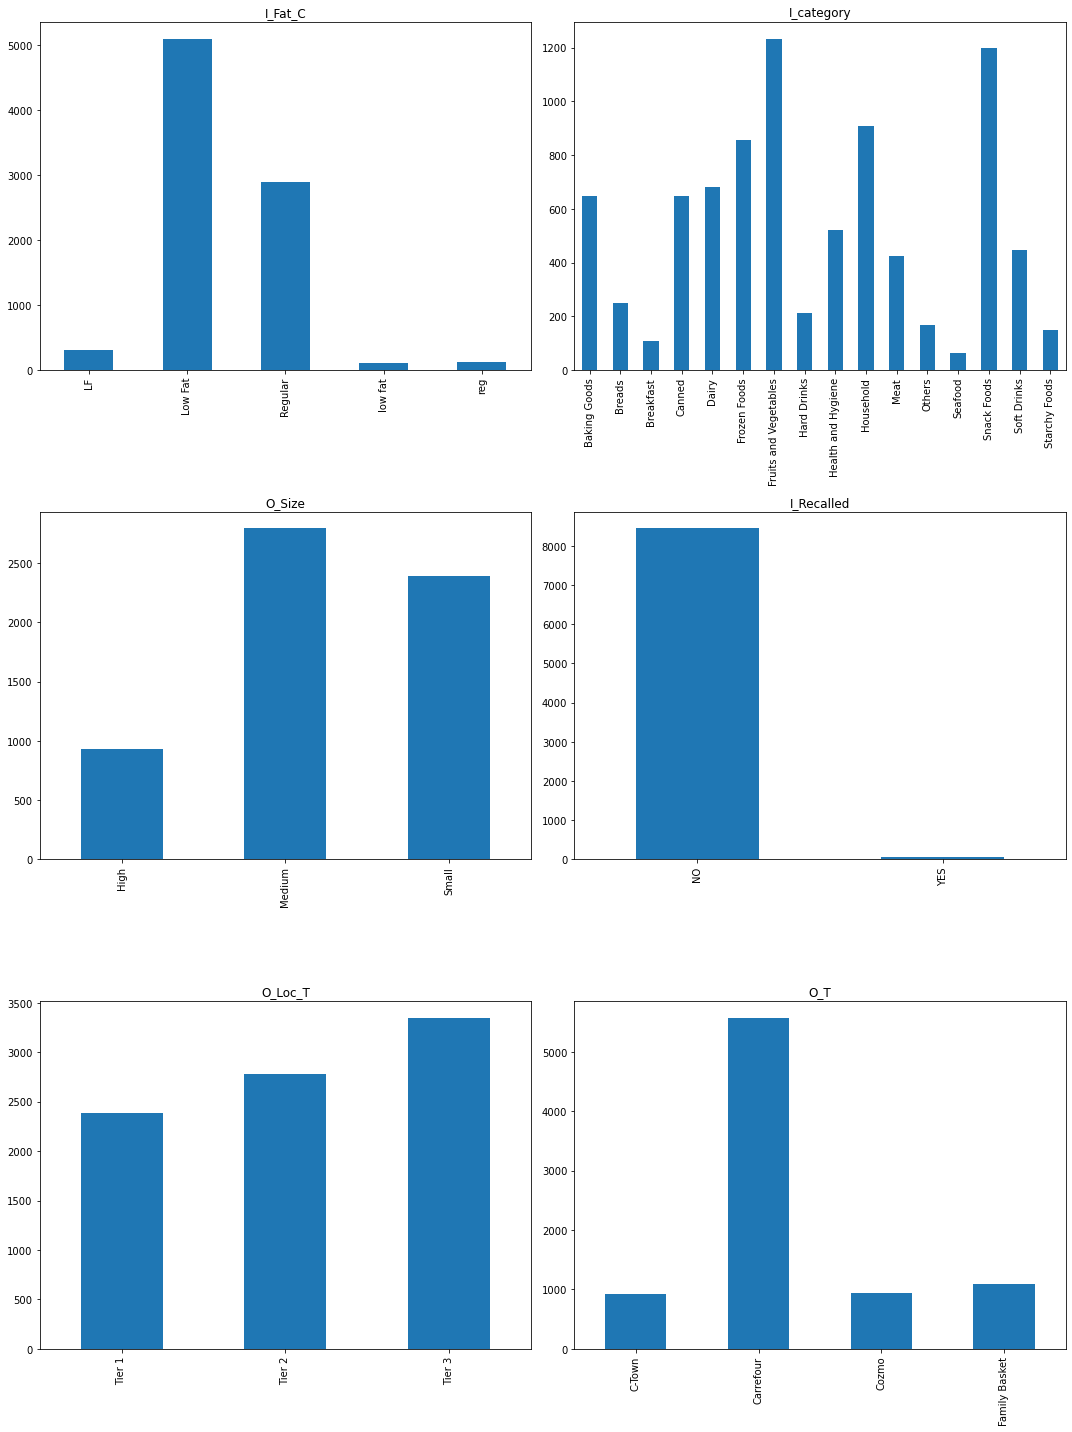

In [19]:
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()


for i, column in enumerate(df[['I_Fat_C','I_category','O_Size', 'I_Recalled','O_Loc_T','O_T']].columns):
    df[['I_Fat_C','I_category','O_Size', 'I_Recalled','O_Loc_T','O_T']][column].value_counts().sort_index().plot(kind='bar', ax=axes[i])
    axes[i].set_title(column)
    
plt.tight_layout()
plt.show()

In [20]:
df.isna().sum()

I_Id             0
I_W           1463
I_Fat_C          0
I_Vis            0
I_MRP_JD         0
I_category       0
I_MRP_US         0
O_Id             0
O_Establ_Y       0
O_Size        2410
I_Recalled       0
O_Loc_T          0
O_T              0
I_O_Sales        0
dtype: int64

In [21]:
df.I_W.fillna(df.I_W.mean(),inplace=True)

In [22]:
df.isna().sum()

I_Id             0
I_W              0
I_Fat_C          0
I_Vis            0
I_MRP_JD         0
I_category       0
I_MRP_US         0
O_Id             0
O_Establ_Y       0
O_Size        2410
I_Recalled       0
O_Loc_T          0
O_T              0
I_O_Sales        0
dtype: int64

In [23]:
df.O_Size.fillna(df.O_Size.value_counts().sort_values(ascending=False).index[0], inplace=True)

In [24]:
df.isna().sum()

I_Id          0
I_W           0
I_Fat_C       0
I_Vis         0
I_MRP_JD      0
I_category    0
I_MRP_US      0
O_Id          0
O_Establ_Y    0
O_Size        0
I_Recalled    0
O_Loc_T       0
O_T           0
I_O_Sales     0
dtype: int64

In [25]:
df.I_Fat_C.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
# fixing values with same meaning
df.I_Fat_C.mask(df.I_Fat_C == 'LF', 'Low Fat', inplace=True)
df.I_Fat_C.mask(df.I_Fat_C == 'reg', 'Regular', inplace=True)
df.I_Fat_C.mask(df.I_Fat_C == 'low fat', 'Low Fat', inplace=True)

In [27]:
df.I_Fat_C.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [28]:
df.drop(columns=['I_Id','O_Id','I_MRP_US'], inplace=True)

In [29]:
df

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_category,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,I_O_Sales
0,9.300,Low Fat,0.016172,225.644532,Dairy,2009,Medium,NO,Tier 1,Carrefour,3915.1380
1,5.920,Regular,0.019403,82.551132,Soft Drinks,2019,Medium,YES,Tier 3,C-Town,623.4228
2,17.500,Low Fat,0.016885,148.828780,Meat,2009,Medium,NO,Tier 1,Carrefour,2277.2700
3,19.200,Regular,0.000000,177.567450,Fruits and Vegetables,2008,Medium,NO,Tier 3,Family Basket,912.3800
4,8.930,Low Fat,0.000000,86.521594,Household,1997,High,NO,Tier 3,Carrefour,1174.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056908,200.590478,Snack Foods,1997,High,NO,Tier 3,Carrefour,2958.3834
8519,8.380,Regular,0.047107,125.071470,Baking Goods,2012,Medium,NO,Tier 2,Carrefour,729.2850
8520,10.600,Low Fat,0.035311,108.716904,Health and Hygiene,2014,Small,NO,Tier 2,Carrefour,1373.1136
8521,7.210,Regular,0.145346,121.504572,Snack Foods,2019,Medium,NO,Tier 3,C-Town,2025.5976


# Gradient descent

In [30]:
df_gd = df.copy()

In [31]:
df_gd

,I_W,I_Fat_C,I_Vis,I_MRP_JD,I_category,O_Establ_Y,O_Size,I_Recalled,O_Loc_T,O_T,I_O_Sales
0,9.300,Low Fat,0.016172,225.644532,Dairy,2009,Medium,NO,Tier 1,Carrefour,3915.1380
1,5.920,Regular,0.019403,82.551132,Soft Drinks,2019,Medium,YES,Tier 3,C-Town,623.4228
2,17.500,Low Fat,0.016885,148.828780,Meat,2009,Medium,NO,Tier 1,Carrefour,2277.2700
3,19.200,Regular,0.000000,177.567450,Fruits and Vegetables,2008,Medium,NO,Tier 3,Family Basket,912.3800
4,8.930,Low Fat,0.000000,86.521594,Household,1997,High,NO,Tier 3,Carrefour,1174.7052
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056908,200.590478,Snack Foods,1997,High,NO,Tier 3,Carrefour,2958.3834
8519,8.380,Regular,0.047107,125.071470,Baking Goods,2012,Medium,NO,Tier 2,Carrefour,729.2850
8520,10.600,Low Fat,0.035311,108.716904,Health and Hygiene,2014,Small,NO,Tier 2,Carrefour,1373.1136
8521,7.210,Regular,0.145346,121.504572,Snack Foods,2019,Medium,NO,Tier 3,C-Town,2025.5976


In [32]:
temp = pd.get_dummies(df_gd.loc[:, ['I_Fat_C','I_category', 'O_Size','I_Recalled','O_Loc_T', 'O_T']])
df_gd.drop(['I_Fat_C','I_category', 'O_Size','I_Recalled','O_Loc_T', 'O_T'], axis=1, inplace=True)
df_gd = pd.concat([df_gd, temp], axis=1)

In [33]:
df_gd

,I_W,I_Vis,I_MRP_JD,O_Establ_Y,I_O_Sales,I_Fat_C_Low Fat,I_Fat_C_Regular,I_category_Baking Goods,I_category_Breads,I_category_Breakfast,...,O_Size_Small,I_Recalled_NO,I_Recalled_YES,O_Loc_T_Tier 1,O_Loc_T_Tier 2,O_Loc_T_Tier 3,O_T_C-Town,O_T_Carrefour,O_T_Cozmo,O_T_Family Basket
0,9.300,0.016172,225.644532,2009,3915.1380,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019403,82.551132,2019,623.4228,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,17.500,0.016885,148.828780,2009,2277.2700,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.200,0.000000,177.567450,2008,912.3800,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,8.930,0.000000,86.521594,1997,1174.7052,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056908,200.590478,1997,2958.3834,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8519,8.380,0.047107,125.071470,2012,729.2850,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,10.600,0.035311,108.716904,2014,1373.1136,1,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
8521,7.210,0.145346,121.504572,2019,2025.5976,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [34]:
df_gd_min_max = df_gd.copy()
df_gd_min_max.loc[:,['I_W', 'I_Vis', 'I_MRP_JD', 'O_Establ_Y']] = df_gd_min_max.loc[:,['I_W', 'I_Vis', 'I_MRP_JD', 'O_Establ_Y']].apply(min_max_normalization)

In [35]:
df_gd_min_max

,I_W,I_Vis,I_MRP_JD,O_Establ_Y,I_O_Sales,I_Fat_C_Low Fat,I_Fat_C_Regular,I_category_Baking Goods,I_category_Breads,I_category_Breakfast,...,O_Size_Small,I_Recalled_NO,I_Recalled_YES,O_Loc_T_Tier 1,O_Loc_T_Tier 2,O_Loc_T_Tier 3,O_T_C-Town,O_T_Carrefour,O_T_Cozmo,O_T_Family Basket
0,0.282525,0.049228,0.927507,0.583333,3915.1380,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,0.081274,0.059063,0.072068,1.000000,623.4228,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,0.770765,0.051398,0.468288,0.583333,2277.2700,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,0.871986,0.000000,0.640093,0.541667,912.3800,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,0.260494,0.000000,0.095805,0.083333,1174.7052,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0.137541,0.173229,0.777729,0.083333,2958.3834,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8519,0.227746,0.143395,0.326263,0.708333,729.2850,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,0.359929,0.107487,0.228492,0.791667,1373.1136,1,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
8521,0.158083,0.442431,0.304939,1.000000,2025.5976,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [36]:
from scipy.stats import zscore

df_gd_zscore = df_gd.copy()

df_gd_zscore.loc[:,['I_W', 'I_Vis', 'I_MRP_JD', 'O_Establ_Y']]=df_gd_zscore.loc[:,['I_W', 'I_Vis', 'I_MRP_JD', 'O_Establ_Y']].apply(zscore)


In [37]:
df_gd_zscore

,I_W,I_Vis,I_MRP_JD,O_Establ_Y,I_O_Sales,I_Fat_C_Low Fat,I_Fat_C_Regular,I_category_Baking Goods,I_category_Breads,I_category_Breakfast,...,O_Size_Small,I_Recalled_NO,I_Recalled_YES,O_Loc_T_Tier 1,O_Loc_T_Tier 2,O_Loc_T_Tier 3,O_T_C-Town,O_T_Carrefour,O_T_Cozmo,O_T_Family Basket
0,-0.841872,-0.970397,1.747454,0.139541,3915.1380,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,-1.641706,-0.907788,-1.489023,1.334103,623.4228,0,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0
2,1.098554,-0.956584,0.010040,0.139541,2277.2700,1,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1.500838,-1.283785,0.660050,0.020085,912.3800,0,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,-0.929428,-1.283785,-1.399220,-1.293934,1174.7052,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,-1.418084,-0.181009,1.180783,-1.293934,2958.3834,1,0,0,0,0,...,0,1,0,0,0,1,0,1,0,0
8519,-1.059578,-0.370933,-0.527301,0.497909,729.2850,0,1,1,0,0,...,0,1,0,0,1,0,0,1,0,0
8520,-0.534243,-0.599520,-0.897208,0.736822,1373.1136,1,0,0,0,0,...,1,1,0,0,1,0,0,1,0,0
8521,-1.336444,1.532735,-0.607977,1.334103,2025.5976,0,1,0,0,0,...,0,1,0,0,0,1,1,0,0,0


In [154]:
class gradient_descent:
    
    def __init__(self, alpha=0.001, iterations=1000):
        self.alpha = alpha
        self.iterations = iterations
        
    def fit(self, x_train, y_train):   
        
        x_train = np.hstack((np.ones((len(y_train),1)), x_train))
        self.theta = np.zeros(len(x_train[0]))
        self.cost_history = np.zeros(self.iterations)
        self.m = len(x_train[0])
        
        for i in range(self.iterations):
            predictions = x_train.dot(self.theta)
            
            errors = np.subtract(predictions, y_train)

            sum_delta = (self.alpha / self.m) * x_train.transpose().dot(errors)

            self.theta = self.theta - sum_delta

            self.cost_history[i] = self.compute_cost(x_train, y_train, self.theta)  

        

            
    def pred(self, x_test):
        x_test = np.hstack((np.ones((len(x_test),1)), x_test))
        y_pred = x_test.dot(self.theta)
            
            
        return y_pred, self.cost_history
    
    
    def compute_cost(self, x,y, theta):
        predictions = x.dot(theta)
        errors = np.subtract(predictions, y) 
        sqrErrors = np.square(errors)
        J = 1/(2 * self.m) * errors.T.dot(errors)
        
        return J

        

In [155]:
Y_min_max=df_gd_min_max.loc[:,'I_O_Sales']

X_min_max=df_gd_min_max.drop(['I_O_Sales'], axis=1)

In [156]:
x_train_min_max, x_test_min_max , y_train_min_max, y_test_min_max = train_test_split(X_min_max, Y_min_max, test_size=0.3, random_state=0)

In [157]:
iterations = 1000

alpha = 0.0001
gd_model_1 = gradient_descent(alpha, iterations)
gd_model_1.fit(x_train_min_max, y_train_min_max)
y_pred_1, cost_history_1 = gd_model_1.pred(x_test_min_max)

alpha = 0.0003
gd_model_2 = gradient_descent(alpha, iterations)
gd_model_2.fit(x_train_min_max, y_train_min_max)
y_pred_2, cost_history_2 = gd_model_2.pred(x_test_min_max)

alpha = 0.001
gd_model_3 = gradient_descent(alpha, iterations)
gd_model_3.fit(x_train_min_max, y_train_min_max)
y_pred_3, cost_history_3 = gd_model_3.pred(x_test_min_max)

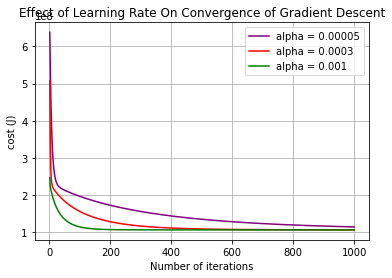

In [158]:
plt.plot(range(1, iterations +1),cost_history_1, color ='purple', label = 'alpha = 0.00005')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'alpha = 0.0003')
plt.plot(range(1, iterations +1), cost_history_3, color ='green', label = 'alpha = 0.001')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of Learning Rate On Convergence of Gradient Descent")
plt.legend();

In [159]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [160]:
mean_absolute_error(y_test_min_max, y_pred_1),mean_absolute_error(y_test_min_max, y_pred_2),mean_absolute_error(y_test_min_max, y_pred_3)

(906.5219008101149, 863.8848643394356, 861.9099736089961)

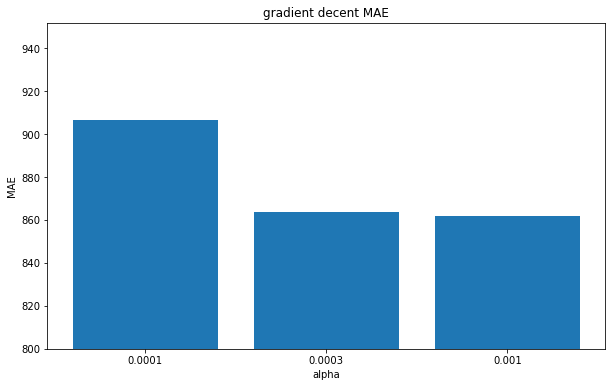

In [161]:
plt.bar(x=['0.0001','0.0003','0.001'], height=[mean_absolute_error(y_test_min_max, y_pred_1),mean_absolute_error(y_test_min_max, y_pred_2),mean_absolute_error(y_test_min_max, y_pred_3)])
plt.title('gradient decent MAE')
plt.ylim(800)
plt.ylabel('MAE')
plt.xlabel('alpha');

In [33]:
mean_squared_error(y_test_min_max, y_pred_1),mean_squared_error(y_test_min_max, y_pred_2),mean_squared_error(y_test_min_max, y_pred_3)

(1463299.2633643616, 1340102.7603612505, 1335216.2032189565)

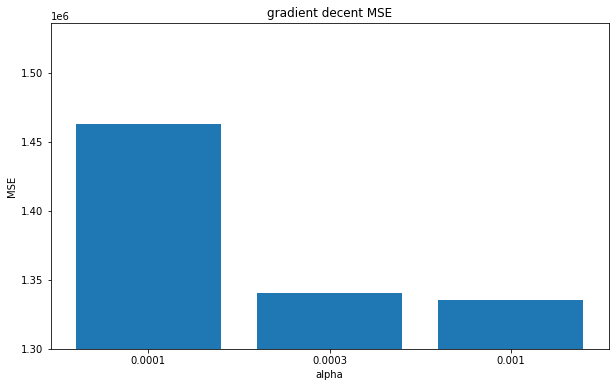

In [34]:
plt.bar(x=['0.0001','0.0003','0.001'], height=[mean_squared_error(y_test_min_max, y_pred_1),mean_squared_error(y_test_min_max, y_pred_2),mean_squared_error(y_test_min_max, y_pred_3)])
plt.title('gradient decent MSE')
plt.ylim(1.3*10**6)
plt.ylabel('MSE')
plt.xlabel('alpha');

In [35]:
np.sqrt(mean_squared_error(y_test_min_max, y_pred_1)),np.sqrt(mean_squared_error(y_test_min_max, y_pred_2)),np.sqrt(mean_squared_error(y_test_min_max, y_pred_3))

(1209.6690718392206, 1157.628075143848, 1155.5155573245029)

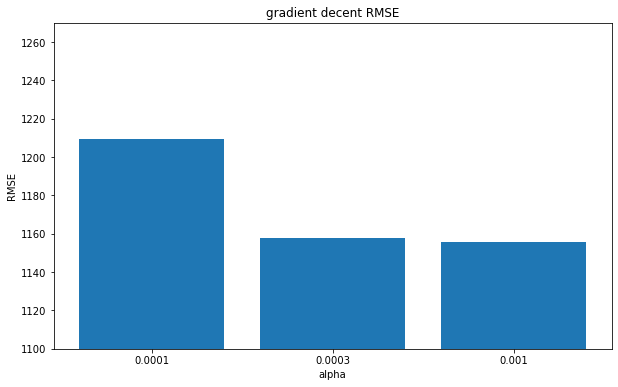

In [36]:
plt.bar(x=['0.0001','0.0003','0.001'], height=[np.sqrt(mean_squared_error(y_test_min_max, y_pred_1)),np.sqrt(mean_squared_error(y_test_min_max, y_pred_2)),np.sqrt(mean_squared_error(y_test_min_max, y_pred_3))])
plt.title('gradient decent RMSE')
plt.ylim(1100)
plt.ylabel('RMSE')
plt.xlabel('alpha');

In [37]:
r2_score(y_test_min_max, y_pred_1),r2_score(y_test_min_max, y_pred_2),r2_score(y_test_min_max, y_pred_3)

(0.5194549307655083, 0.5599124595480784, 0.5615171968694539)

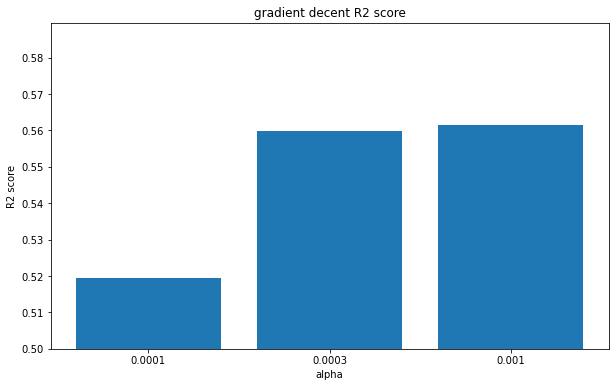

In [38]:
plt.bar(x=['0.0001','0.0003','0.001'], height=[r2_score(y_test_min_max, y_pred_1),r2_score(y_test_min_max, y_pred_2),r2_score(y_test_min_max, y_pred_3)])
plt.title('gradient decent R2 score')
plt.ylim(0.5)
plt.ylabel('R2 score')
plt.xlabel('alpha');

In [39]:
Y_zscore=df_gd_zscore.loc[:,'I_O_Sales']
X_zscore=df_gd_zscore.drop(['I_O_Sales'], axis=1)
x_train_zscore, x_test_zscore, y_train_zscore, y_test_zscore = train_test_split(X_zscore,Y_zscore,test_size=0.3, random_state=0)

In [40]:
Y=df_gd.loc[:,'I_O_Sales']
X=df_gd.drop(['I_O_Sales'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.3, random_state=0)

In [41]:
iterations = 1000
alpha = 0.0003

gd_model_min_max = gradient_descent(alpha, iterations)
gd_model_min_max.fit(x_train_min_max, y_train_min_max)
y_pred_1, cost_history_1 = gd_model_min_max.pred(x_test_min_max)


gd_model_zscore = gradient_descent(alpha, iterations)
gd_model_zscore.fit(x_train_zscore, y_train_zscore)
y_pred_2, cost_history_2 = gd_model_zscore.pred(x_test_zscore)


gd_model_no_norm = gradient_descent(alpha, iterations)
gd_model_no_norm.fit(x_train, y_train)
y_pred_3, cost_history_3 = gd_model_no_norm.pred(x_test)

C:\Users\Housam\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)


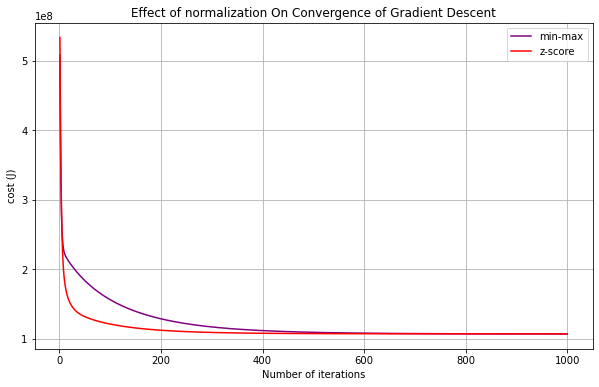

In [42]:
plt.plot(range(1, iterations +1), cost_history_1, color ='purple', label = 'min-max')
plt.plot(range(1, iterations +1), cost_history_2, color ='red', label = 'z-score')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel("Number of iterations")
plt.ylabel("cost (J)")
plt.title("Effect of normalization On Convergence of Gradient Descent")
plt.legend();

In [43]:
'min_max ',mean_absolute_error(y_test, y_pred_1),'zscore: ',mean_absolute_error(y_test, y_pred_2), 'no norm: failed goes to inf'

('min_max ',
 863.8848643394356,
 'zscore: ',
 863.5689704942382,
 'no norm: failed goes to inf')

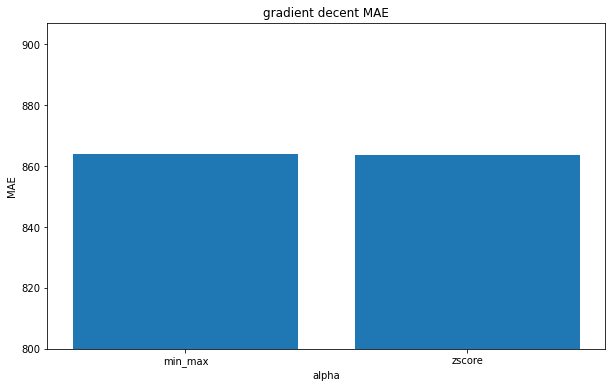

In [44]:
plt.bar(x=['min_max','zscore'], height=[mean_absolute_error(y_test, y_pred_1), mean_absolute_error(y_test, y_pred_2)])
plt.title('gradient decent MAE')
plt.ylim(800)
plt.ylabel('MAE')
plt.xlabel('alpha');

In [45]:
'min_max ',mean_squared_error(y_test, y_pred_1),'zscore: ',mean_squared_error(y_test, y_pred_2), 'no norm: failed goes to inf'

('min_max ',
 1340102.7603612505,
 'zscore: ',
 1342215.9313423014,
 'no norm: failed goes to inf')

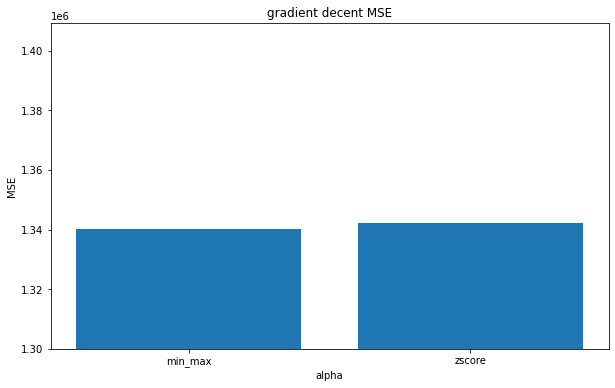

In [46]:
plt.bar(x=['min_max','zscore'], height=[mean_squared_error(y_test, y_pred_1),mean_squared_error(y_test, y_pred_2)])
plt.title('gradient decent MSE')
plt.ylim(1.3*10**6)
plt.ylabel('MSE')
plt.xlabel('alpha');

In [47]:
'min_max ',np.sqrt(mean_squared_error(y_test, y_pred_1)),'zscore: ',np.sqrt(mean_squared_error(y_test, y_pred_2)), 'no norm: failed goes to inf'

('min_max ',
 1157.628075143848,
 'zscore: ',
 1158.540431466378,
 'no norm: failed goes to inf')

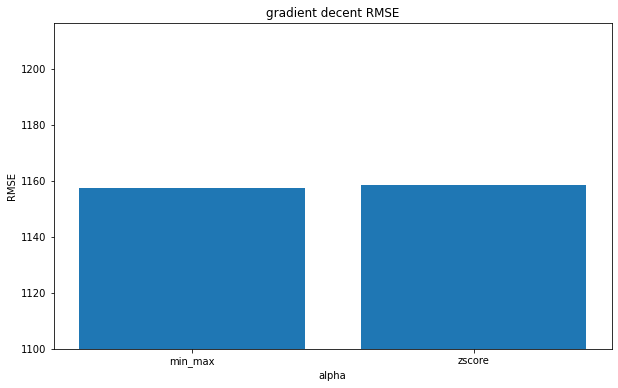

In [48]:
plt.bar(x=['min_max','zscore'], height=[np.sqrt(mean_squared_error(y_test, y_pred_1)),np.sqrt(mean_squared_error(y_test, y_pred_2))])
plt.title('gradient decent RMSE')
plt.ylim(1100)
plt.ylabel('RMSE')
plt.xlabel('alpha');

In [49]:
'min_max ',r2_score(y_test_min_max, y_pred_1),'zscore: ',r2_score(y_test, y_pred_2)

('min_max ', 0.5599124595480784, 'zscore: ', 0.5592184976765617)

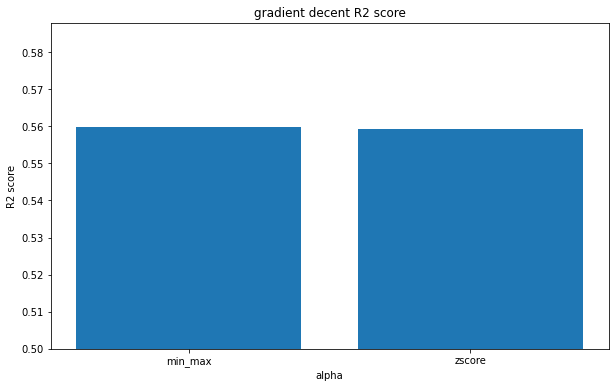

In [50]:
plt.bar(x=['min_max','zscore'], height=[r2_score(y_test, y_pred_1),r2_score(y_test, y_pred_2)])
plt.title('gradient decent R2 score')
plt.ylim(0.5)
plt.ylabel('R2 score')
plt.xlabel('alpha');